# Ian Smith - 19178816

The aim of this Jupyter notebook is to implement different machine learning algorithms and pick the 'best' one that predicts whether an individual will experience financial distress in the next two years. It is a binary classification prbblem and the methodology that will be followed is KDD.

First I will begin by importing the relevant data. It is obtained from Kaggle (https://www.kaggle.com/c/GiveMeSomeCredit/data). 

In [1]:
!pip install xelatex

  ERROR: Could not find a version that satisfies the requirement xelatex (from versions: none)
ERROR: No matching distribution found for xelatex


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.style as style
#style.use("seaborn")

In [2]:
style.use("seaborn")

In [3]:
#Import the data

train = pd.read_csv("credit_training.csv")
test = pd.read_csv("credit_test.csv")
train.head()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
print(train.shape)
print(test.shape)

(150000, 12)
(101503, 12)


In [5]:
train.describe()

,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


# Data Cleaning
Will carry out some basic data cleaning. Will perfrom further data cleaning after EDA.

In [6]:
#Will check the data for any null values
train.isnull().sum()

Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [7]:
train.duplicated().sum() #No duplicate rows which is good

0

In [8]:
train["MonthlyIncome"].fillna(train["MonthlyIncome"].median(),inplace=True)
#Filled with median as mean is influenced by outliers.
#graphs show why this is a good decision. 
train.dropna(inplace=True)

In [9]:
train.isnull().sum()

Unnamed: 0                              0
SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
dtype: int64

# Exploratory Data Analysis

Now that all the null values have been dealt with it is time to carry out some EDA and get some preliminary visualisations.

In [10]:
train.columns

Index(['Unnamed: 0', 'SeriousDlqin2yrs',
       'RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

Text(0.5, 1.0, 'Number of deliquent and non-deliquent loans')

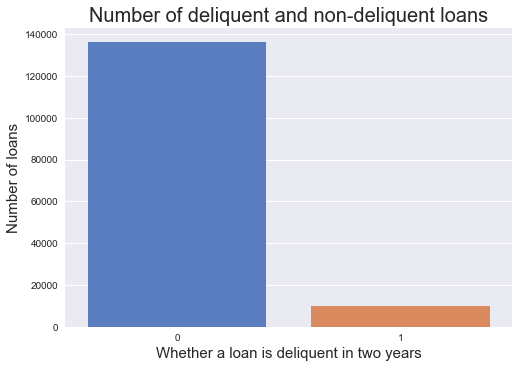

In [11]:
#Examined the target variable "seriouddlqin2yrs" and found that the dataset was very unbalanced.
sns.countplot(x=train["SeriousDlqin2yrs"],palette = "muted")
plt.xlabel("Whether a loan is deliquent in two years",fontsize=15)
plt.ylabel("Number of loans", fontsize = 15 )
plt.title("Number of deliquent and non-deliquent loans", fontsize = 20)

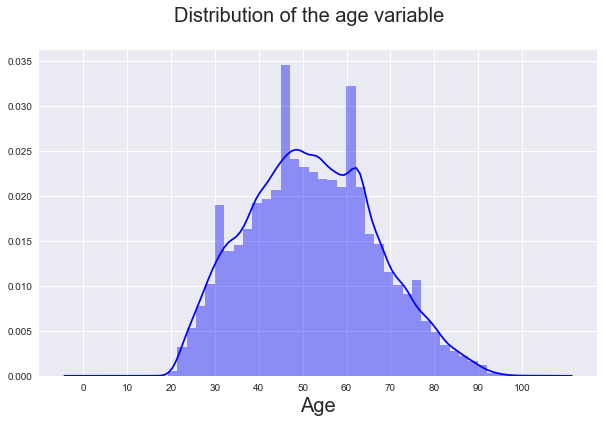

In [12]:
#Age could very well be an important feature so will also visualise this. 
fig, ax = plt.subplots(figsize=(10,6))

sns.distplot(train["age"],hist=True, color="b")
fig.suptitle('Distribution of the age variable', fontsize=20)
ax.set_xlabel('Age', fontsize=15)

ax.xaxis.label.set_size(20)
plt.xticks(np.arange(0,110,10))
plt.draw()

In [13]:
train["MonthlyIncome"].quantile(q=0.90)

10833.0

Text(0.5, 0, 'Monthly Income')

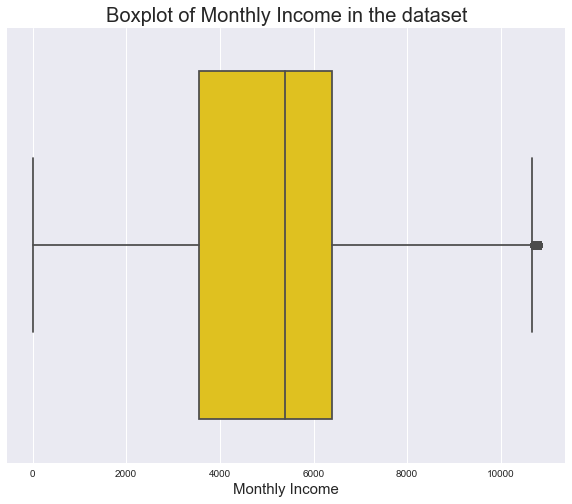

In [14]:
plt.figure(figsize=(10,8))
sns.boxplot(x= "MonthlyIncome",data=train.loc[train["MonthlyIncome"]<=10833],palette = "prism")
plt.title("Boxplot of Monthly Income in the dataset",fontsize=20)
plt.xlabel("Monthly Income",fontsize=15)

Text(0.5, 0, 'Total number of times 30-59 days past due date')

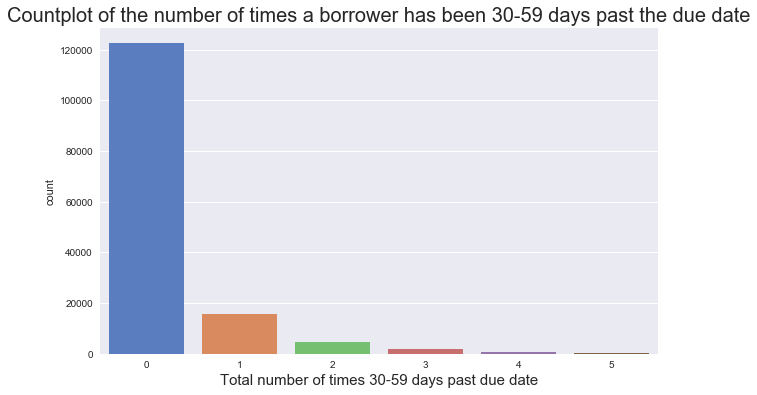

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x="NumberOfTime30-59DaysPastDueNotWorse",data=
              train.loc[train["NumberOfTime30-59DaysPastDueNotWorse"]<=5],palette="muted")

plt.title("Countplot of the number of times a borrower has been 30-59 days past the due date",fontsize=20)
plt.xlabel("Total number of times 30-59 days past due date",fontsize=15)

Text(0.5, 0, 'Total number of times 60-89 days past due date')

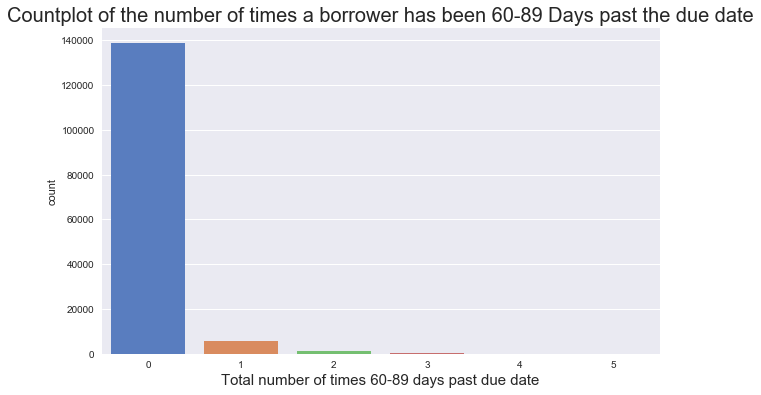

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x="NumberOfTime60-89DaysPastDueNotWorse",data=
              train.loc[train["NumberOfTime60-89DaysPastDueNotWorse"]<=5],palette="muted")

plt.title("Countplot of the number of times a borrower has been 60-89 Days past the due date",fontsize=20)
plt.xlabel("Total number of times 60-89 days past due date",fontsize=15)

Text(0.5, 0, 'Total number of times borrowers have been 90 days past due date')

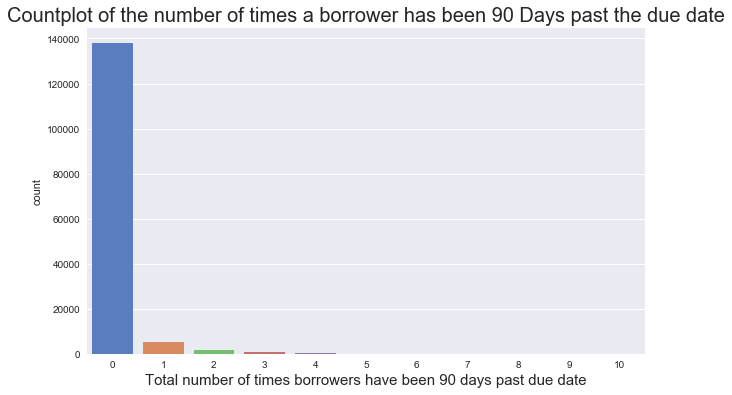

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x="NumberOfTimes90DaysLate",data=train.loc[train['NumberOfTimes90DaysLate']<=10],palette="muted")

plt.title("Countplot of the number of times a borrower has been 90 Days past the due date",fontsize=20)
plt.xlabel("Total number of times borrowers have been 90 days past due date",fontsize=15)

Text(0.5, 1.0, 'Distribution of open credit lines and loans variable')

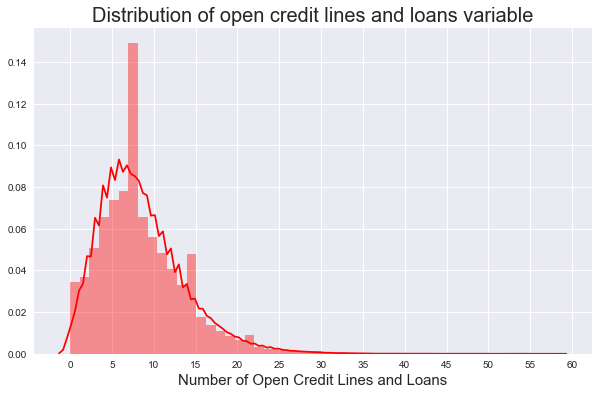

In [18]:
plt.figure(figsize=(10,6))
sns.distplot(train["NumberOfOpenCreditLinesAndLoans"],hist=True,color="r")
plt.xticks(np.arange(0,65,5))
plt.xlabel("Number of Open Credit Lines and Loans",fontsize=15)
plt.title("Distribution of open credit lines and loans variable",fontsize=20)

In [19]:
train["NumberOfOpenCreditLinesAndLoans"].quantile(q=0.95)

18.0

([<matplotlib.axis.XTick at 0x1975ba416c8>,
 <a list of 11 Text xticklabel objects>)

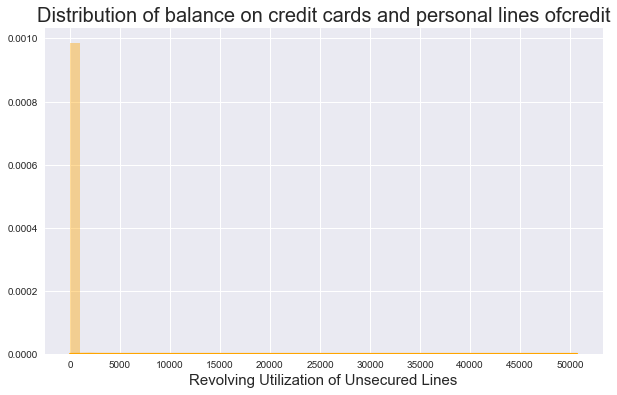

In [20]:
plt.figure(figsize=(10,6))
sns.distplot(train["RevolvingUtilizationOfUnsecuredLines"],color="orange")
plt.xlabel("Revolving Utilization of Unsecured Lines",fontsize=15)
plt.title("Distribution of balance on credit cards and personal lines ofcredit",fontsize=20)
plt.xticks(np.arange(0,55000,5000))

In [21]:
train["RevolvingUtilizationOfUnsecuredLines"].quantile(q=0.975)

0.9999998999999999

Text(0.5, 1.0, 'Countplot of the number of Real Estate Loans or Lines')

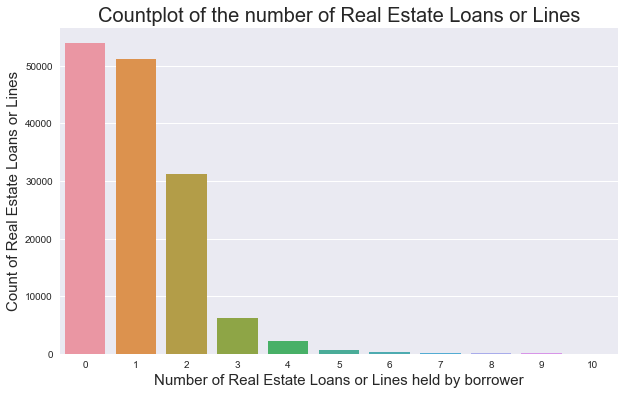

In [22]:
plt.figure(figsize=(10,6))
sns.countplot(x= "NumberRealEstateLoansOrLines", data = 
                    train.loc[train["NumberRealEstateLoansOrLines"]<=10])

plt.xlabel("Number of Real Estate Loans or Lines held by borrower",fontsize=15)
plt.ylabel("Count of Real Estate Loans or Lines",fontsize=15)
plt.title("Countplot of the number of Real Estate Loans or Lines",fontsize=20)

Text(0, 0.5, 'Count')

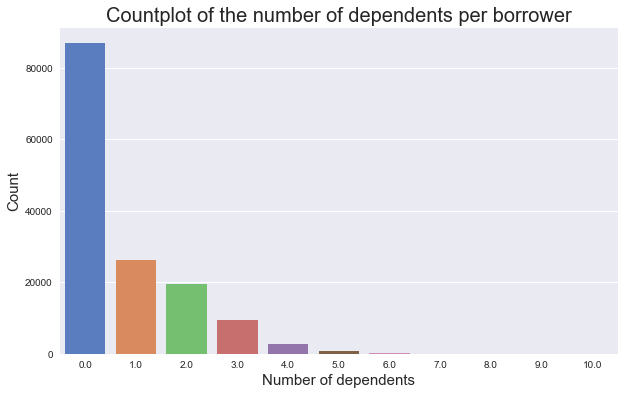

In [23]:
plt.figure(figsize=(10,6))
sns.countplot(x = "NumberOfDependents", data = train.loc[train["NumberOfDependents"]<=10],palette= "muted")
plt.title("Countplot of the number of dependents per borrower",fontsize=20)
plt.xlabel("Number of dependents",fontsize=15)
plt.ylabel("Count",fontsize =15)

# Further Data Cleaning

Now some further data cleaning will be carried out. An attempt will be made to balance the data and also to remove any outliers that have been identified from the EDA.

- SeriousDlqin2yrs has a massive imbalance. Will try and balance it out.
- Number of Open Credit lines is skewed right. Will remove any that are greater than 21.
- Monthly Income is a problematic variable. Seriously positively skewed. Take only values that are in the top 95%. This corresponds to any values that are less than or equal to 17000.
- Number of dependents will be less than 10.
- Number of real estate loans will be less than 10.
- Revolving Utilization Of Unsecured Lines will be less than 97.5th percentile. This correspond to values that are less than 0.9999998999999999. Aim is to remove massive variance. 
- Number of times late variables will be less than 10 days. This captures most of the data but doesn't include any outliers.

In [24]:
train1 = train.copy()

(array([ 1733.,  4238.,  6755.,  9234., 10695., 11454., 11240., 20238.,
         8155.,  7032.,  5834.,  4713.,  3752.,  2937.,  4271.]),
 array([ 0.        ,  1.13333333,  2.26666667,  3.4       ,  4.53333333,
         5.66666667,  6.8       ,  7.93333333,  9.06666667, 10.2       ,
        11.33333333, 12.46666667, 13.6       , 14.73333333, 15.86666667,
        17.        ]),
 <a list of 15 Patch objects>)

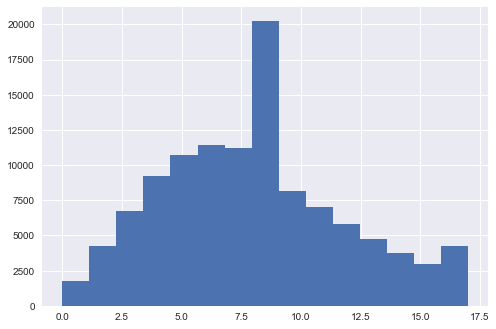

In [77]:
# Number of Open credit lines
creditdrop = train1.loc[(train1["NumberOfOpenCreditLinesAndLoans"]>=18)].index
train1.drop(creditdrop,inplace=True)
plt.hist(x="NumberOfOpenCreditLinesAndLoans",bins=15,data=train1)

In [26]:
#Monthly Income
MI = train1.loc[(train1["MonthlyIncome"]>=10833)].index
train1.drop(MI, inplace=True)

In [27]:
lines = train1.loc[(train1["RevolvingUtilizationOfUnsecuredLines"]>=0.9999998999999999)].index
train1.drop(lines,inplace=True)

In [28]:
indexNames = train1.loc[(train1["NumberOfDependents"]>=10)&(train1["NumberRealEstateLoansOrLines"]>=10)
                       & (train1["NumberOfTime60-89DaysPastDueNotWorse"]>=10) & 
                        (train1["NumberOfTime30-59DaysPastDueNotWorse"]>=10)
                       & (train1["NumberOfTimes90DaysLate"]>=10)].index
train1.drop(indexNames,inplace=True)

In [29]:
#train["NumberOfDependents"] = train.loc[train["NumberOfDependents"]<= 10]
#train["NumberRealEstateLoansOrLines"] = train.loc[train["NumberRealEstateLoansOrLines"]<= 10]
#train["NumberOfTime60-89DaysPastDueNotWorse"] = train.loc[train["NumberOfTime60-89DaysPastDueNotWorse"]<= 10]
#train["NumberOfTime30-59DaysPastDueNotWorse"] = train.loc[train["NumberOfTime30-59DaysPastDueNotWorse"]<= 10]
#train["NumberOfTimes90DaysLate"] = train.loc[train["NumberOfTimes90DaysLate"]<= 10]

In [30]:
#This essentially serves as a cheakpoint. 
df = train.copy()
print(df.shape)

(146076, 12)


In [31]:
df.drop(columns = "Unnamed: 0",inplace=True)

In [32]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


# Data Mining

Although I have not carried out any resampling methods yet I want to first implement a basic logistic regression model first. I will not be performing any model tuning. I will compare the performance of the first model versus the resampling model. Then I will focus on model tuning and implementing different methods.

In [33]:
#Begin by importing the relevant libraries
#import the relevant libraries
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import classification_report, confusion_matrix
import itertools

print("Libraries imported!")

Libraries imported!


In [37]:
#Create our X and y variables.
X = df.loc[:, df.columns != "SeriousDlqin2yrs"]
X = X.to_numpy()
X[0:5]

array([[7.66126609e-01, 4.50000000e+01, 2.00000000e+00, 8.02982129e-01,
        9.12000000e+03, 1.30000000e+01, 0.00000000e+00, 6.00000000e+00,
        0.00000000e+00, 2.00000000e+00],
       [9.57151019e-01, 4.00000000e+01, 0.00000000e+00, 1.21876201e-01,
        2.60000000e+03, 4.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 1.00000000e+00],
       [6.58180140e-01, 3.80000000e+01, 1.00000000e+00, 8.51133750e-02,
        3.04200000e+03, 2.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [2.33809776e-01, 3.00000000e+01, 0.00000000e+00, 3.60496820e-02,
        3.30000000e+03, 5.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00],
       [9.07239400e-01, 4.90000000e+01, 1.00000000e+00, 2.49256950e-02,
        6.35880000e+04, 7.00000000e+00, 0.00000000e+00, 1.00000000e+00,
        0.00000000e+00, 0.00000000e+00]])

In [38]:
y = df.loc[:, df.columns =="SeriousDlqin2yrs"]
y = y.to_numpy()
y = y.ravel()
y[0:5]

array([1, 0, 0, 0, 0], dtype=int64)

Don't normalize before train_test_split to avoid data leakage.

In [36]:
#Normalize the data
#X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
#X[0:3]

array([[-0.02061882, -0.48612015,  0.39774193, -0.17108422,  0.20474209,
         0.86818279, -0.06303413,  4.38772481, -0.05679574,  1.11451664],
       [-0.01985493, -0.82849315, -0.10191665, -0.1714346 , -0.29444463,
        -0.87955445, -0.06303413, -0.9090261 , -0.05679574,  0.21772181],
       [-0.02105048, -0.96544235,  0.14791264, -0.17145351, -0.26060405,
        -1.2679405 ,  0.1884001 , -0.9090261 , -0.05679574, -0.67907301]])

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = None)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (116860, 10) (116860,)
Test set: (29216, 10) (29216,)


### Downsampling

This method involves randomly removing records from the majority class. The method we will use is resample without replacement.

It is important to downsample AFTER splitting into a train/test/split. This prevents duplicate values appearing and will prevent overfitting.

In [40]:
from sklearn.utils import resample
df["SeriousDlqin2yrs"].value_counts()

0    136229
1      9847
Name: SeriousDlqin2yrs, dtype: int64

In [41]:
# Separate input features and target
y = df.loc[:,df.columns == "SeriousDlqin2yrs"]
X = df.loc[:,df.columns != "SeriousDlqin2yrs"]

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

#Will separate majority and minority classes
df_majority = X[X["SeriousDlqin2yrs"]==0]
df_minority = X[X["SeriousDlqin2yrs"]==1]

#Now will downsample the majority class.
df_majority_downsampled = resample(df_majority,
                                  replace = False,
                                  n_samples = len(df_minority),
                                  random_state=123) #This allows reproducible results.
# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])

df_downsampled.SeriousDlqin2yrs.value_counts()

1    7441
0    7441
Name: SeriousDlqin2yrs, dtype: int64

In [42]:
print(len(X))
print(len(y))

109557
146076


## Logistic Regression on downsampled data

In [43]:
y_train = df_downsampled.SeriousDlqin2yrs
X_train = df_downsampled.drop("SeriousDlqin2yrs",axis=1)
print(y_train.shape)
print(X_train.shape)

(14882,)
(14882, 10)


In [44]:
downsampled_reg = LogisticRegression(solver="liblinear",C=0.001).fit(X_train,y_train)

yhat1 = downsampled_reg.predict(X_test)

print(confusion_matrix(y_test,yhat1))

print(classification_report(y_test,yhat1))

[[30075  4038]
 [ 1031  1375]]
              precision    recall  f1-score   support

           0       0.97      0.88      0.92     34113
           1       0.25      0.57      0.35      2406

    accuracy                           0.86     36519
   macro avg       0.61      0.73      0.64     36519
weighted avg       0.92      0.86      0.88     36519



## RandomForest on downsampled data

In [45]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators =22).fit(X_train,y_train)

rfc_pred = rfc.predict(X_test)

print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.98      0.79      0.87     34113
           1       0.20      0.76      0.32      2406

    accuracy                           0.79     36519
   macro avg       0.59      0.77      0.60     36519
weighted avg       0.93      0.79      0.84     36519



## Decision Tree on downsampled data

In [46]:
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth = 7).fit(X_train,y_train)

treepred = treeclf.predict(X_test)

print(classification_report(y_test,treepred))

              precision    recall  f1-score   support

           0       0.98      0.82      0.89     34113
           1       0.22      0.72      0.34      2406

    accuracy                           0.81     36519
   macro avg       0.60      0.77      0.62     36519
weighted avg       0.93      0.81      0.86     36519



## SVM on downsampled data

In [49]:
from sklearn.ensemble import BaggingClassifier

bagclf = BaggingClassifier(n_estimators = 10, bootstrap = True, random_state=123).fit(X_train,y_train)

bagpred = bagclf.predict(X_test)

print(confusion_matrix(y_test,bagpred))
print(classification_report(y_test,bagpred))

[[27007  7106]
 [  689  1717]]
              precision    recall  f1-score   support

           0       0.98      0.79      0.87     34113
           1       0.19      0.71      0.31      2406

    accuracy                           0.79     36519
   macro avg       0.58      0.75      0.59     36519
weighted avg       0.92      0.79      0.84     36519



## Hyperparameter Tuning
Therefore, I will try and perfrom some hyperparameter tuning on bagging classifier.

## Bagged Decision Tree

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

model = BaggingClassifier()
n_estimators = [10,20,30,40,50]
max_features = [1,2,4,6,8,10]
bootstrap = ["True","False"]
bootstrap_features = ["True","False"]

#Will now define grid search
grid = dict(n_estimators = n_estimators, max_features= max_features, bootstrap = bootstrap, 
            bootstrap_features = bootstrap_features)
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
grid_search = GridSearchCV(estimator = model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [53]:
# Hyperparameter tuning on logistic regression.
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.765690 using {'bootstrap': 'True', 'bootstrap_features': 'True', 'max_features': 10, 'n_estimators': 50}
0.664561 (0.042580) with: {'bootstrap': 'True', 'bootstrap_features': 'True', 'max_features': 1, 'n_estimators': 10}
0.678695 (0.034133) with: {'bootstrap': 'True', 'bootstrap_features': 'True', 'max_features': 1, 'n_estimators': 20}
0.686444 (0.026855) with: {'bootstrap': 'True', 'bootstrap_features': 'True', 'max_features': 1, 'n_estimators': 30}
0.691551 (0.027674) with: {'bootstrap': 'True', 'bootstrap_features': 'True', 'max_features': 1, 'n_estimators': 40}
0.690095 (0.027540) with: {'bootstrap': 'True', 'bootstrap_features': 'True', 'max_features': 1, 'n_estimators': 50}
0.695493 (0.027386) with: {'bootstrap': 'True', 'bootstrap_features': 'True', 'max_features': 2, 'n_estimators': 10}
0.717601 (0.019460) with: {'bootstrap': 'True', 'bootstrap_features': 'True', 'max_features': 2, 'n_estimators': 20}
0.723984 (0.012788) with: {'bootstrap': 'True', 'bootstrap_features'

In [63]:
#Best: 0.765690 using {'bootstrap': 'True', 'bootstrap_features': 'True', 'max_features': 10, 'n_estimators': 50}
bagclfh = BaggingClassifier(bootstrap = "True",bootstrap_features = "True", max_features=10,
                           n_estimators = 60).fit(X_train,y_train)

bagpred = bagclfh.predict(X_test)

print(confusion_matrix(y_test,bagpred))
print(classification_report(y_test,bagpred))

[[26651  7462]
 [  572  1834]]
              precision    recall  f1-score   support

           0       0.98      0.78      0.87     34113
           1       0.20      0.76      0.31      2406

    accuracy                           0.78     36519
   macro avg       0.59      0.77      0.59     36519
weighted avg       0.93      0.78      0.83     36519



In [64]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

print("Recall score is:", recall_score(y_test,bagpred))
print("Precision score is:",precision_score(y_test,bagpred))
print("F1-score is:",f1_score(y_test,bagpred))

Recall score is: 0.7622610141313383
Precision score is: 0.19728915662650603
F1-score is: 0.31345069218936933


In [66]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = metrics.roc_curve(y_test,bagpred,pos_label=1)
print("AUC score is:",metrics.auc(fpr,tpr))

AUC score is: 0.7717587133213488


No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.850


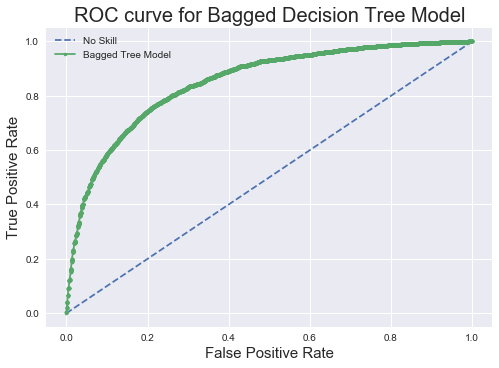

In [69]:
#Plot of the RUC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#Generate a no skill prediction for majority class
ns_probs = [0 for _ in range(len(y_test))]

bag_prob = bagclfh.predict_proba(X_test)
bag_prob = bag_prob[:,1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, bag_prob)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, bag_prob)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Bagged Tree Model')
# axis labels
plt.title("ROC curve for Bagged Decision Tree Model",fontsize=20)
plt.xlabel('False Positive Rate',fontsize= 15)
plt.ylabel('True Positive Rate',fontsize = 15)
# show the legend
plt.legend()
# show the plot
plt.show()

In [73]:
feature_importances = np.mean([
    tree.feature_importances_ for tree in bagclfh.estimators_
], axis=0)

In [74]:
feature_importancs

array([0.11247022, 0.10332723, 0.10441772, 0.09827774, 0.0679534 ,
       0.12501942, 0.09642395, 0.10941204, 0.08872824, 0.09397004])

## Logistic Regression

In [65]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
#Define model and hyperparameters to be used.
model = LogisticRegression()
solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100, 10, 1.0, 0.1, 0.01,0.001]

#Will now define grid search
grid = dict(solver = solvers, penalty = penalty, C= c_values)
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
grid_search = GridSearchCV(estimator = model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

C:\Users\LtSmi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [51]:
# Hyperparameter tuning on logistic regression.
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.720311 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.713591 (0.010674) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.662523 (0.044088) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.715562 (0.011266) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.713457 (0.010698) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.662993 (0.049747) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.717623 (0.012687) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.713681 (0.010654) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'newton-cg'}
0.651346 (0.061116) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'lbfgs'}
0.715966 (0.010719) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'liblinear'}
0.713367 (0.010786) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'newton-cg'}
0.659477 (0.054961) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
0.717533 (0.010665) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'liblinear'}
0.712180 (0.010708) wi

### Decision Tree

In [44]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold

In [45]:
model = DecisionTreeClassifier()
criterion = ["gini","entropy"]
max_depth = [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20.21,22,23,24,25,26,27,28,29,30]
max_features = ["log2","sqrt",None]
splitter = ["best","random"]

#Define the grid search
grid = dict(criterion = criterion, max_depth = max_depth,max_features = max_features,splitter=splitter)
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
grid_search = GridSearchCV(estimator = model, param_grid = grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [46]:
print("Best %f using %s" % (grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best 0.766877 using {'criterion': 'entropy', 'max_depth': 5, 'max_features': None, 'splitter': 'best'}
0.709089 (0.046756) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': 'log2', 'splitter': 'best'}
0.534852 (0.036663) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': 'log2', 'splitter': 'random'}
0.708932 (0.039941) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'splitter': 'best'}
0.551091 (0.046247) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt', 'splitter': 'random'}
0.747032 (0.009693) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'splitter': 'best'}
0.586503 (0.043737) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': None, 'splitter': 'random'}
0.728173 (0.038833) with: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2', 'splitter': 'best'}
0.559849 (0.051284) with: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2', 'splitter': 'random'}
0.729494 (0.026911) with: {'c

In [ ]:
#Best 0.766698 using {'criterion': 'entropy', 'max_depth': 5, 'max_features': None,splitter="best"}
#Best 0.761322 using {'criterion': 'entropy', 'max_depth': 8, 'max_features': 'sqrt'}

In [55]:
#Logistic Regression model
#Best: 0.720311 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}

logreg = LogisticRegression(C=0.01,penalty = "l2",solver="liblinear").fit(X_train,y_train)

logispred = logreg.predict(X_test)
print(confusion_matrix(y_test,logispred))
print(classification_report(y_test,logispred))

[[29290  4823]
 [  941  1465]]
              precision    recall  f1-score   support

           0       0.97      0.86      0.91     34113
           1       0.23      0.61      0.34      2406

    accuracy                           0.84     36519
   macro avg       0.60      0.73      0.62     36519
weighted avg       0.92      0.84      0.87     36519



In [55]:
#Decision Tree
#Creating the model
treeclf = DecisionTreeClassifier(criterion = 'entropy', max_depth = 7, max_features= None,splitter="best")
treeclf.fit(X_train,y_train)
treepred = treeclf.predict(X_test)

print(confusion_matrix(y_test,treepred))
print(classification_report(y_test,treepred))

[[28662  5451]
 [  730  1676]]
              precision    recall  f1-score   support

           0       0.98      0.84      0.90     34113
           1       0.24      0.70      0.35      2406

    accuracy                           0.83     36519
   macro avg       0.61      0.77      0.63     36519
weighted avg       0.93      0.83      0.87     36519



In [56]:
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

print("Recall score is:", recall_score(y_test,treepred))
print("Precision score is:",precision_score(y_test,treepred))
print("F1-score is:",f1_score(y_test,treepred))

Recall score is: 0.6965918536990856
Precision score is: 0.2351620597726954
F1-score is: 0.35162068603797336


In [91]:
from sklearn import metrics
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = metrics.roc_curve(y_test,treepred,pos_label=1)
print("AUC score is:",metrics.auc(fpr,tpr))

AUC score is: 0.7683996996047974


No Skill: ROC AUC=0.500
Decision Tree: ROC AUC=0.848


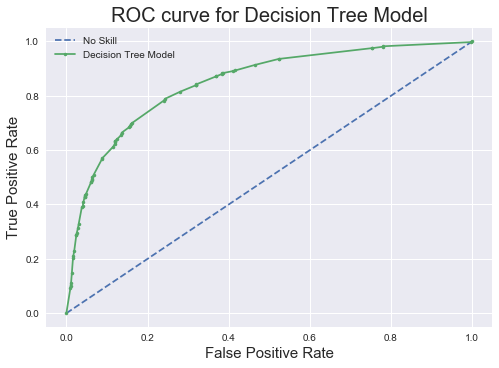

In [76]:
#Plot of the RUC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
#Generate a no skill prediction for majority class
ns_probs = [0 for _ in range(len(y_test))]

tree_prob = treeclf.predict_proba(X_test)
tree_prob = tree_prob[:,1]

# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, tree_prob)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Decision Tree: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, tree_prob)
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Decision Tree Model')
# axis labels
plt.title("ROC curve for Decision Tree Model",fontsize=20)
plt.xlabel('False Positive Rate',fontsize= 15)
plt.ylabel('True Positive Rate',fontsize = 15)
# show the legend
plt.legend()
# show the plot
plt.show()

Decision tree: f1=0.352 auc=0.341


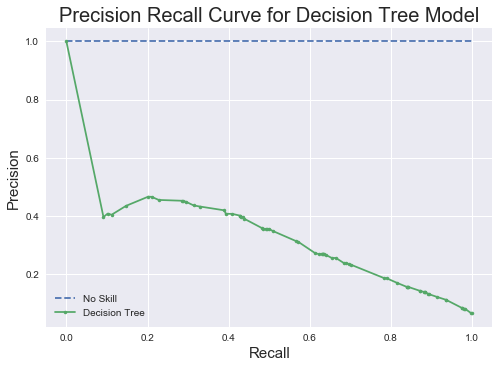

In [82]:
#Will also plot a precision recall curve too. This is useful when we have imbalanced classes
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import auc

lr_precision, lr_recall, _ = precision_recall_curve(y_test, tree_prob)
lr_f1, lr_auc = f1_score(y_test, treepred), auc(lr_recall, lr_precision)
# summarize scores
print('Decision tree: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
plt.plot(lr_recall, lr_precision, marker='.', label='Decision Tree')
# axis labels
plt.title("Precision Recall Curve for Decision Tree Model",fontsize=20)
plt.xlabel('Recall',fontsize=15)
plt.ylabel('Precision',fontsize=15)
# show the legend
plt.legend()
# show the plot
plt.show()

### Visualising decision tree

In [66]:
#using graphviz
from sklearn import tree
import graphviz
fn = [ 'UtilizationOfLines', 'age',
       '30-59DaysPastDue', 'DebtRatio', 'MonthlyIncome',
       'OpenCreditLinesAndLoans', '90DaysLate',
       'RealEstate', '60-89DaysPastDue',
       'NumberOfDependents'] #Feature names from the dataset
cn = ["0","1"] #Class names 
tree.export_graphviz(treeclf,
                     out_file="tree.dot",
                     feature_names = fn, 
                     class_names=cn,
                     filled = True,
                    max_depth = None)


In [67]:
!dot -Tpng tree.dot -o tree_full.png

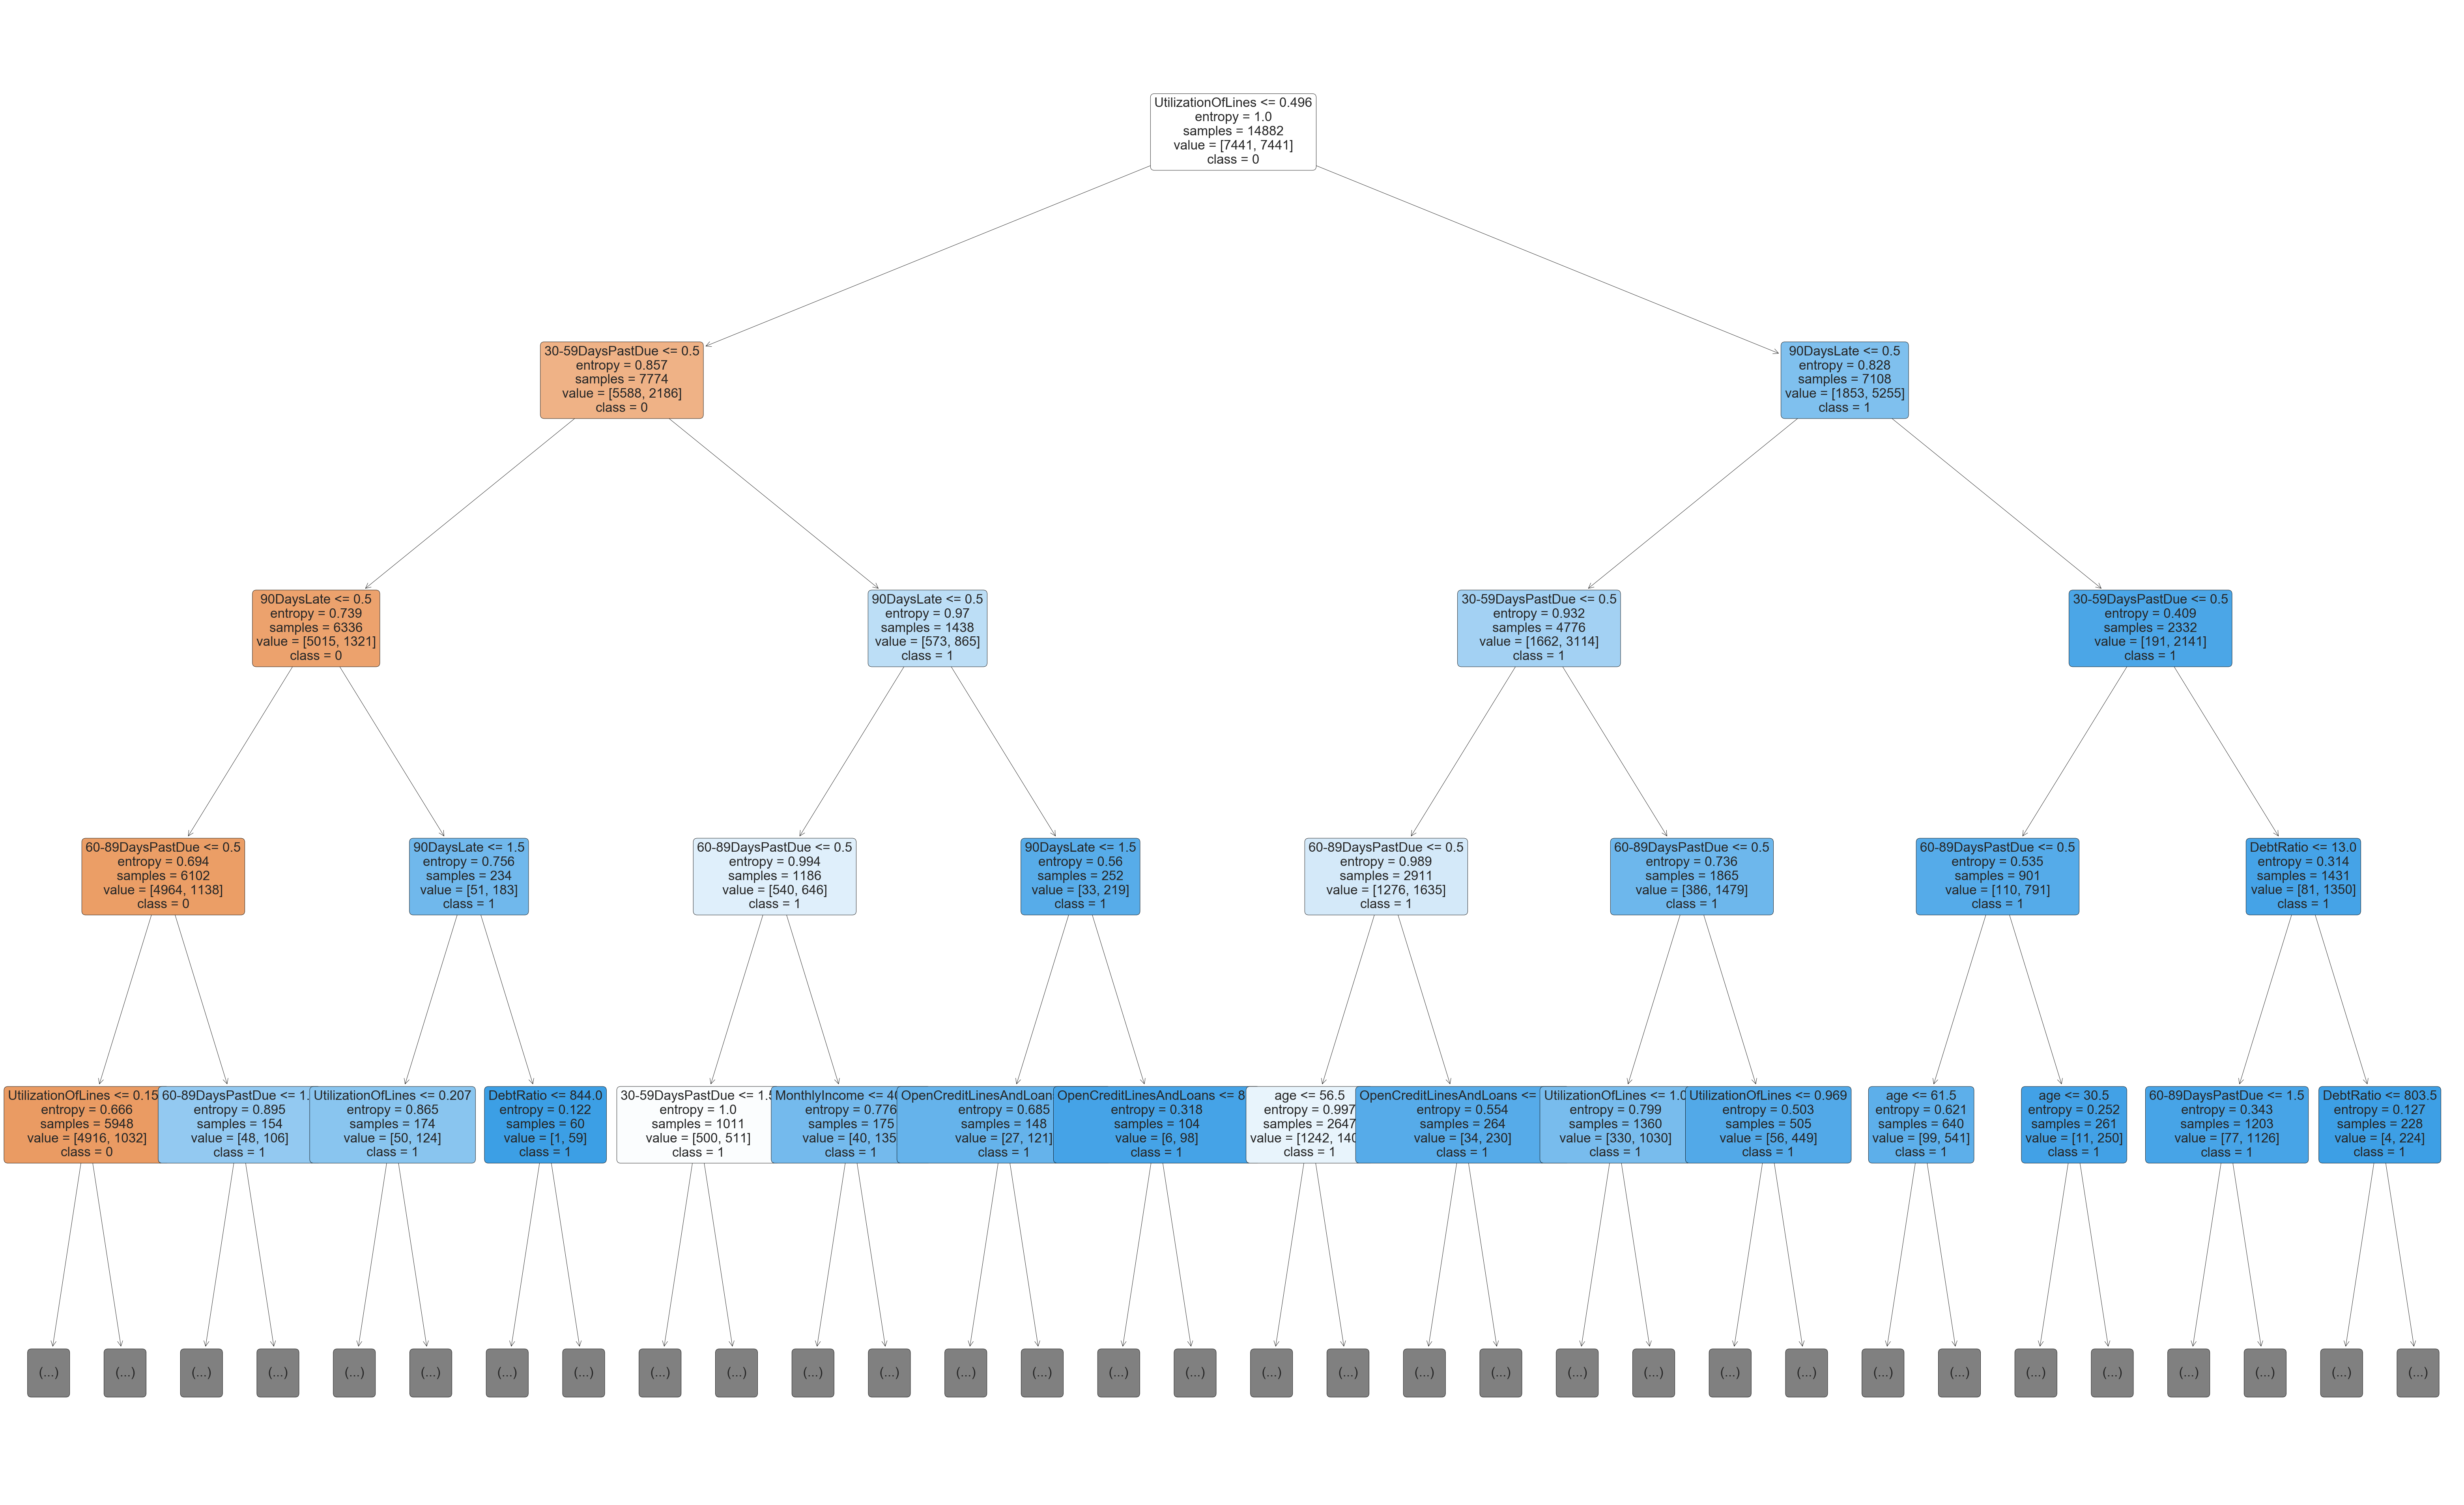

In [103]:
from sklearn import tree
fn = [ 'UtilizationOfLines', 'age',
       '30-59DaysPastDue', 'DebtRatio', 'MonthlyIncome',
       'OpenCreditLinesAndLoans', '90DaysLate',
       'RealEstate', '60-89DaysPastDue',
       'NumberOfDependents'] #Feature names from the dataset
cn = ["0","1"] #Class names 

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (40,25), dpi=200)

tree.plot_tree(treeclf,
               feature_names = fn,
               class_names = cn,
               max_depth = 4,
              filled = True,
              rounded = True, fontsize = 12)

fig.savefig('loantree.png')

Text(0.5, 0, 'Feature Important')

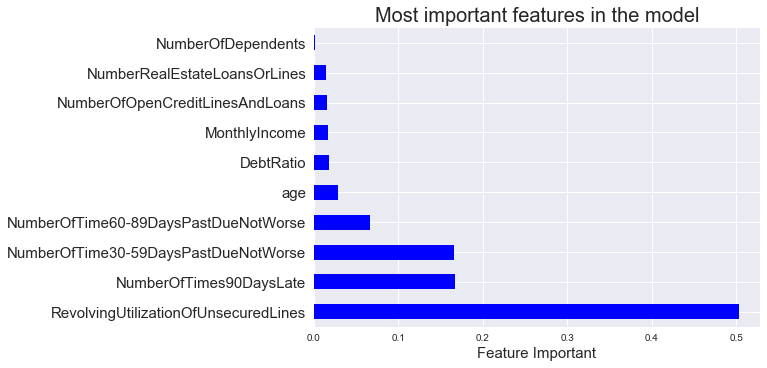

In [84]:
feat_importances = pd.Series(treeclf.feature_importances_, index=X_test.columns)
feat_importances.nlargest(20).plot(kind='barh',color="blue")
plt.title("Most important features in the model",fontsize=20)
plt.yticks(fontsize=15)
plt.xlabel("Feature Important",fontsize = 15)

In [90]:
dftest = pd.DataFrame(y_test)
#dftest.head()
dftest["SeriousDlqin2yrs"].value_counts()

0    34113
1     2406
Name: SeriousDlqin2yrs, dtype: int64

In [59]:
#Random Forest Classifier
#Best: 0.777494 using {'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 20

forclf = RandomForestClassifier(n_estimators = 20,max_depth=10,max_features="sqrt").fit(X_train,y_train)

forpred = forclf.predict(X_test)

print(confusion_matrix(y_test,forpred))
print(classification_report(y_test,forpred))

[[26648  7465]
 [  512  1894]]
              precision    recall  f1-score   support

           0       0.98      0.78      0.87     34113
           1       0.20      0.79      0.32      2406

    accuracy                           0.78     36519
   macro avg       0.59      0.78      0.60     36519
weighted avg       0.93      0.78      0.83     36519



In [60]:
fpr, tpr, thresholds = metrics.roc_curve(y_test,forpred,pos_label=1)
metrics.auc(fpr,tpr)

0.7841835697450595

# Up-sampling

Now that downsampling has been implemented and different ML algorithms applied to the downsampled data upsampling will be carried out.

In [64]:
from sklearn.utils import resample

#Split dataset into minority and majority class.
# Separate input features and target
y = df.loc[:,df.columns == "SeriousDlqin2yrs"]
X = df.loc[:,df.columns != "SeriousDlqin2yrs"]

# setting up testing and training sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

# concatenate our training data back together
X = pd.concat([X_train, y_train], axis=1)

#Will separate majority and minority classes
df_majority = X[X["SeriousDlqin2yrs"]==0]
df_minority = X[X["SeriousDlqin2yrs"]==1]

#Now will upsample the majority class.
df_minority_upsampled = resample(df_minority,
                                  replace = True,
                                  n_samples = len(df_majority), #Same amount as reproducible 
                                  random_state=123) #This allows reproducible results.
# Combine minority class with downsampled majority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

df_upsampled.SeriousDlqin2yrs.value_counts()

1    102116
0    102116
Name: SeriousDlqin2yrs, dtype: int64

## Logistic Regression on Upsampled data

In [66]:
y_train = df_upsampled.SeriousDlqin2yrs
X_train = df_upsampled.drop("SeriousDlqin2yrs",axis=1)
print(y_train.shape)
print(X_train.shape)

(204232,)
(204232, 11)


In [74]:
upsampled_reg = LogisticRegression(solver="liblinear",C=0.001).fit(X_train,y_train)

yhat1 = upsampled_reg.predict(X_test)

print(confusion_matrix(y_test,yhat1))

print(classification_report(y_test,yhat1))

[[28524  5589]
 [  875  1531]]
              precision    recall  f1-score   support

           0       0.97      0.84      0.90     34113
           1       0.22      0.64      0.32      2406

    accuracy                           0.82     36519
   macro avg       0.59      0.74      0.61     36519
weighted avg       0.92      0.82      0.86     36519



## Decision Tree on Upsampled Data

In [91]:
from sklearn.tree import DecisionTreeClassifier
treeclf = DecisionTreeClassifier(max_depth = 9).fit(X_train,y_train)

treepred = treeclf.predict(X_test)

print(confusion_matrix(y_test,treepred))
print(classification_report(y_test,treepred))

[[27277  6836]
 [  647  1759]]
              precision    recall  f1-score   support

           0       0.98      0.80      0.88     34113
           1       0.20      0.73      0.32      2406

    accuracy                           0.80     36519
   macro avg       0.59      0.77      0.60     36519
weighted avg       0.93      0.80      0.84     36519



In [96]:
# Hyperparameter tuning for the upsampled decision tree model.

model = DecisionTreeClassifier()
criterion = ["gini","entropy"]
max_depth = [1,2,3,4,5,6,7,8,9,10,11,12]
max_features = ["sqrt","log2"]

#Define the grid search
grid = dict(criterion = criterion, max_depth = max_depth, max_features=max_features)
cv = RepeatedStratifiedKFold(n_splits=10,n_repeats=3,random_state=1)
grid_search = GridSearchCV(estimator = model, param_grid = grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_train, y_train)

In [97]:
print("Best %f using %s" % (grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best 0.808303 using {'criterion': 'gini', 'max_depth': 12, 'max_features': 'sqrt'}
0.666312 (0.050561) with: {'criterion': 'gini', 'max_depth': 1, 'max_features': 'sqrt'}
0.661397 (0.055844) with: {'criterion': 'gini', 'max_depth': 1, 'max_features': 'log2'}
0.703164 (0.051537) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': 'sqrt'}
0.693850 (0.051734) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': 'log2'}
0.733362 (0.025032) with: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'sqrt'}
0.728613 (0.032148) with: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'log2'}
0.745126 (0.019440) with: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt'}
0.746868 (0.020631) with: {'criterion': 'gini', 'max_depth': 4, 'max_features': 'log2'}
0.756932 (0.006692) with: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt'}
0.755768 (0.011519) with: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2'}
0.764727 (0.007133) with: {'criterion

In [104]:
treeclf1 = DecisionTreeClassifier(criterion = "entropy",max_depth = 12,max_features = "sqrt").fit(X_train,y_train)

treepred1 = treeclf1.predict(X_test)

print(confusion_matrix(y_test,treepred1))
print(classification_report(y_test,treepred1))

[[27922  6191]
 [  801  1605]]
              precision    recall  f1-score   support

           0       0.97      0.82      0.89     34113
           1       0.21      0.67      0.31      2406

    accuracy                           0.81     36519
   macro avg       0.59      0.74      0.60     36519
weighted avg       0.92      0.81      0.85     36519

